# XGBoost

https://xgboost.readthedocs.io/en/stable/index.html

핵심 파라미터

1. learning_rate: 각 트리의 기여도를 조절하는 학습률로, 값이 작을수록 모델의 복잡도가 낮아지지만 더 많은 트리를 필요로 한다.
2. n_estimators: 트리의 개수를 의미하며, 많을수록 복잡한 모델이 된다.
3. max_depth: 각 트리의 최대 깊이로, 트리가 너무 깊으면 과적합될 수 있다.
4. objective: 손실 함수의 종류로, 회귀 문제의 경우 'reg:squarederror', 분류 문제의 경우 'binary:logistic' 등을 사용한다.

In [2]:
!pip install xgboost

In [3]:
# 아이리스 데이터셋 분류 활용
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier   # XGBoost는 scikit-learn과 비슷한 API 제공

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=0)

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0
)
xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

1.0
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [4]:
# 유방암 데이터셋 이진분류 활용
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0
)
xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

1.0
0.986013986013986
[[52  1]
 [ 1 89]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [5]:
# 조기종료 적용 -> 과적합 방지/훈련시간 단축
xgb_clf = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=0,
    early_stopping_rounds=10,   # 성능이 일정 횟수 이상 향상되지 않으면 조기종료
    eval_metric='logloss'
)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0)
eval_set = [(X_tr, y_tr), (X_val, y_val)]

xgb_clf.fit(X_tr, y_tr, eval_set=eval_set, verbose=True)
# eval_set: 검증 데이터
# verbose: 학습 중 평과 결과 출력 여부

[0]	validation_0-logloss:0.57452	validation_1-logloss:0.60880
[1]	validation_0-logloss:0.50928	validation_1-logloss:0.55472
[2]	validation_0-logloss:0.45694	validation_1-logloss:0.50527
[3]	validation_0-logloss:0.40953	validation_1-logloss:0.46292
[4]	validation_0-logloss:0.36927	validation_1-logloss:0.42700
[5]	validation_0-logloss:0.33481	validation_1-logloss:0.39919
[6]	validation_0-logloss:0.30438	validation_1-logloss:0.37171
[7]	validation_0-logloss:0.27723	validation_1-logloss:0.34853
[8]	validation_0-logloss:0.25387	validation_1-logloss:0.32843
[9]	validation_0-logloss:0.23308	validation_1-logloss:0.30965
[10]	validation_0-logloss:0.21360	validation_1-logloss:0.29418
[11]	validation_0-logloss:0.19725	validation_1-logloss:0.28057
[12]	validation_0-logloss:0.18229	validation_1-logloss:0.26975
[13]	validation_0-logloss:0.16936	validation_1-logloss:0.25935
[14]	validation_0-logloss:0.15736	validation_1-logloss:0.24851
[15]	validation_0-logloss:0.14565	validation_1-logloss:0.23954
[1

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,'logloss'


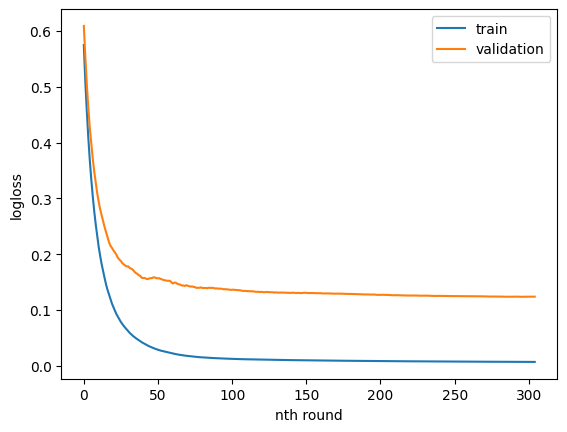

In [6]:
# 훈련 과정 시각화 (학습 곡선)
import matplotlib.pyplot as plt

result = xgb_clf.evals_result()
train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.legend()
plt.xlabel('nth round')
plt.ylabel('logloss')
plt.show()

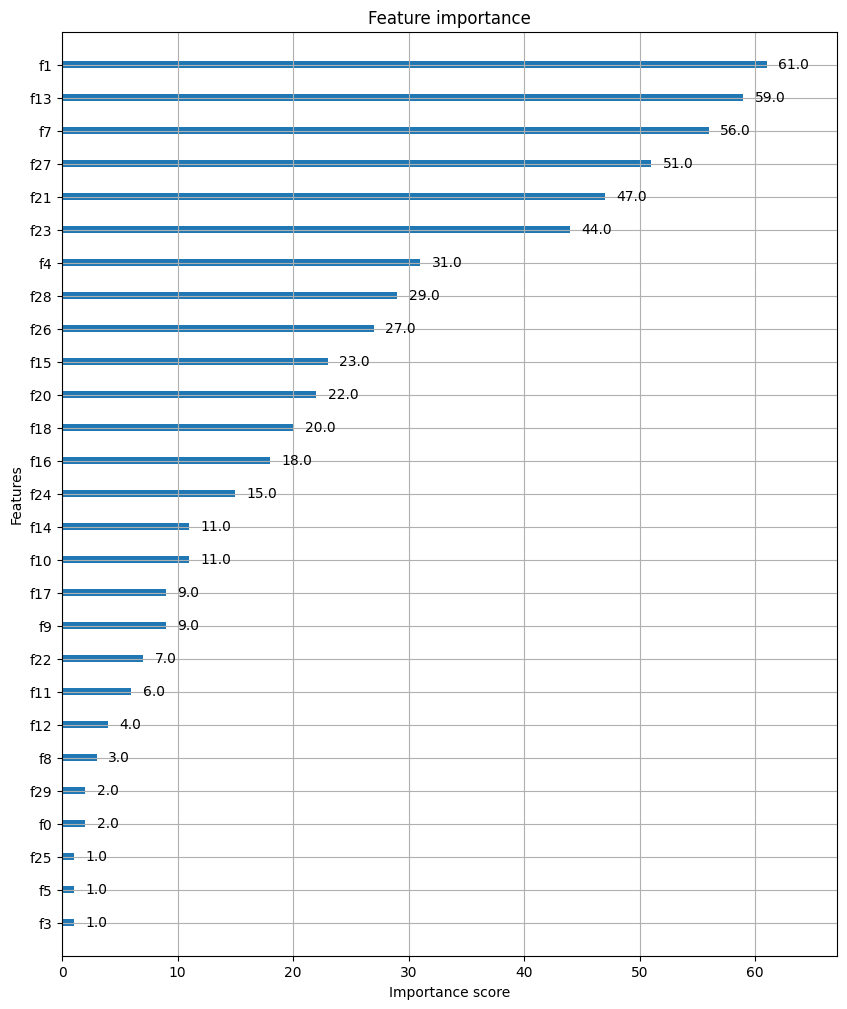

In [7]:
# 특성 중요도 시각화
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_clf, ax=ax)
plt.show()